In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

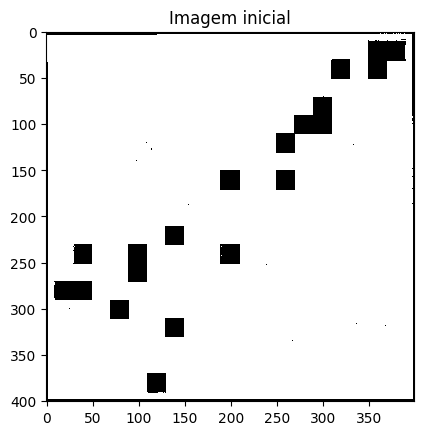

In [9]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)

image_copia = 1.0 * (image > 250)

goal = np.array([70, 300])
robo = np.array([300, 25]) 

image_copia[goal[0]][goal[1]] = 0 
image_copia[robo[0]][robo[1]] = 0   

fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 1')

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.title('Imagem inicial')
plt.show()

In [10]:
# #tentativa falha
# obstaculos = np.argwhere(image_copia == 0) #saber onde tem obstacúlos
# coordenadas = list()
# ft = 0
# ka = 1
# kr = 1000
# p0 = 15

# def forca_att(pos, goal):
#     atrativa = (ka * ((math.dist(pos-goal))**2))/2
#     return atrativa

# def forca_rep(pos, obstaculos):
#     p_q = math.dist(pos, obstaculos)
#     if p_q > p0:
#         return 0
#     else:
#         repulsiva = (kr*(((1/p_q)-(1/p0))**2))/2
#     return repulsiva

In [11]:
#print(obstaculos)

In [12]:
# #tentativa falha
# ponto = goal
# parar = False
# caminho = list()
# vezes = 0

# while(vezes <1000):
#     vezes += 1
#     for l in range (-1,2):
#         for c in range (-1,2):
#             print("entrou nos dois for")
#             try:
#                 print("entrou no try")
#                 if(image_copia[ponto[0]+l][ponto[1]+c] == 1):
#                     print("entrou no if")
#                     fa = forca_att(([ponto[0]+l][ponto[1]+c]), goal)
#                     fr= forca_rep(([ponto[0]+l][ponto[1]+c]), obstaculos)
#                     ft = fa + fr

#                     print(fa, fr, ft)

#                     image_copia[ponto[0]+ l][ponto[1]+c]= ft
#                     caminho.append(ft)
#                     coordenadas.append([ponto[0]+ l, ponto[1]+c])

#                 if(ponto[0]+l == robo[0] and ponto[1]+c == robo[1]):
#                     parar = True
#                     break
#             except: 
#                 continue
#         if(parar == True):
#             break   
#     if(parar == True):
#            break   
    
#     ponto = coordenadas.pop(0)
    

In [13]:
# #tentativa falha
# mapa_forca = np.zeros(image_copia.shape)

# for l in range(mapa_forca.shape[0]):
    
#     for c in range(mapa_forca.shape[1]):
#         posicao_atual = (l,c)
#         print(posicao_atual)
#         fa = forca_att(([l][c]), goal)
#         fr = forca_rep(([l][c]), obstaculos)
#         ft = fa + fr
#         print(fa, fr, ft, posicao_atual)

#         mapa_forca[l][c]= ft
#         coordenadas.append([l][c])

In [14]:
# print(obstaculos)
# print(ft)

Quantidade de testes não suficientes


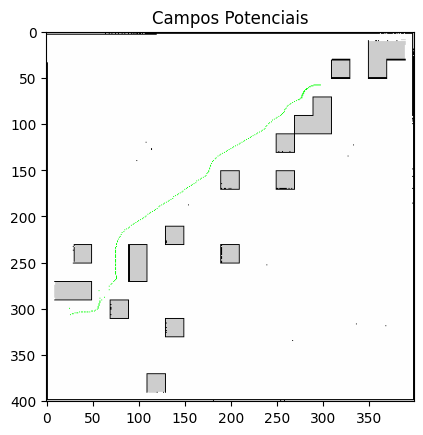

In [16]:
ka = 2 
kr = 300  
p0 = 20  
passo = 1  
ruido = 0.1  

def forca_atrativa(pos, goal, ka=2):
    direcao = goal - pos
    distancia = np.linalg.norm(direcao)
    if distancia > 0:
        return ka * direcao / distancia 
    return np.array([0, 0])

def forca_repulsiva(pos, obstaculos, kr=300, p0=20):
    forca_total = np.array([0.0, 0.0])
    for obs in obstaculos:
        direcao = pos - obs
        distancia = np.linalg.norm(direcao)
        if 0 < distancia < p0:
            repul = kr * ((1 / distancia) - (1 / p0)) * (direcao / (distancia**3))
            forca_total += repul
    return forca_total


obstaculos = np.argwhere(image_copia == 0) #função de achar todas as coordenadas que tem obstaculo
caminho = [robo]


# caminho do robo
posicao_atual = robo.copy()
ultimo_passo = posicao_atual.copy() 
tolerancia_movimento = 0.1  

while np.linalg.norm(goal - posicao_atual) > 2: 
    fa = forca_atrativa(posicao_atual, goal)
    fr = forca_repulsiva(posicao_atual, obstaculos)
    ft = fa + fr

    ruido_aleatorio = np.random.uniform(-ruido, ruido, 2)
    posicao_atual = posicao_atual + passo * (ft + ruido_aleatorio)
    caminho.append(posicao_atual.astype(int))

    if np.linalg.norm(posicao_atual - ultimo_passo) < tolerancia_movimento:
        print("O robô tá preso!!")
        ultimo_passo += ruido_aleatorio 

    if len(caminho) > 1500:
        print("Quantidade de testes não suficientes")
        break


#colorindo caminho
image_com_caminho = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)
for ponto in caminho:
    image_com_caminho[ponto[0], ponto[1]] = [0, 255, 0]

fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 3')

plt.imshow(image_com_caminho)
plt.title('Campos Potenciais')
plt.show()


In [17]:
print(caminho)

[array([300,  25]), array([307,  26]), array([306,  28]), array([306,  29]), array([305,  31]), array([305,  33]), array([305,  34]), array([304,  36]), array([304,  38]), array([304,  39]), array([304,  41]), array([304,  42]), array([304,  44]), array([304,  45]), array([304,  47]), array([303,  49]), array([303,  50]), array([303,  52]), array([302,  53]), array([301,  55]), array([301,  55]), array([300,  56]), array([299,  56]), array([299,  56]), array([298,  56]), array([298,  56]), array([297,  57]), array([297,  57]), array([296,  57]), array([296,  57]), array([295,  57]), array([295,  57]), array([294,  58]), array([294,  58]), array([293,  58]), array([292,  58]), array([291,  60]), array([289,  58]), array([288,  63]), array([281,  57]), array([280,  68]), array([276,  68]), array([274,  70]), array([273,  71]), array([271,  73]), array([270,  74]), array([269,  75]), array([268,  76]), array([267,  76]), array([266,  76]), array([265,  76]), array([263,  75]), array([262,